# Visualizing the data

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from preprocessing import generate_balanced_data, hog_features
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
from time import time
import random
from visiualising import visualize_samples, visualize_preds

In [18]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [19]:
dataset = np.load('../data/dataset.npz')
X, y = dataset['X'], dataset['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=seed, stratify=y
)

X_train_bal, y_train_bal = generate_balanced_data(X_train, y_train, seed=seed)

dataset2 = np.load('../data/corrupt_dataset.npz')
X2 = dataset2['X']


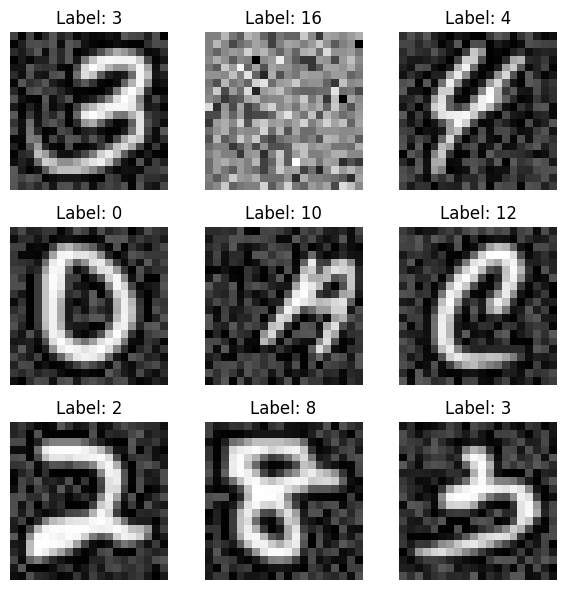

In [20]:
visualize_samples(X_train, y_train)

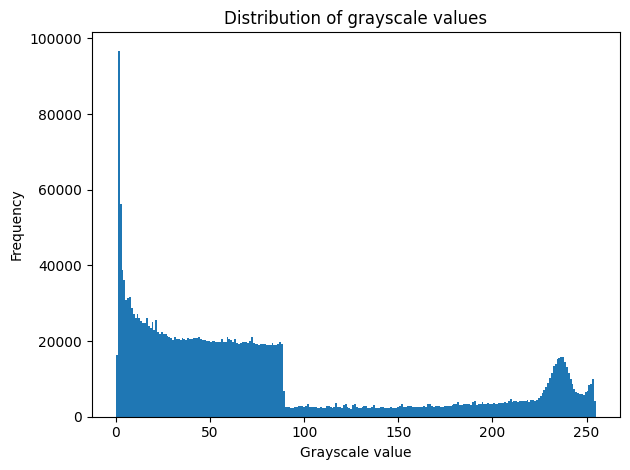

In [21]:
#distribution of grayscale values
gray_values = X_train.flatten()
plt.hist(gray_values, bins=256)
plt.title('Distribution of grayscale values')
plt.xlabel('Grayscale value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../other/imgs/grayscale_distribution.png')
plt.show()

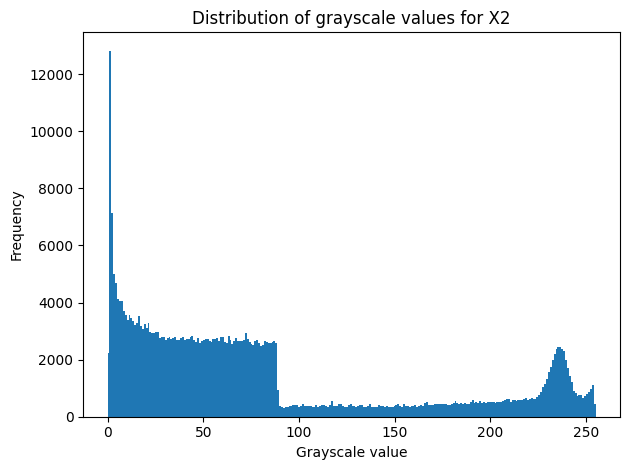

In [22]:
# Distribution of grayscale values for X2
gray_values_X2 = X2.flatten()
plt.hist(gray_values_X2, bins=256)
plt.title('Distribution of grayscale values for X2')
plt.xlabel('Grayscale value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

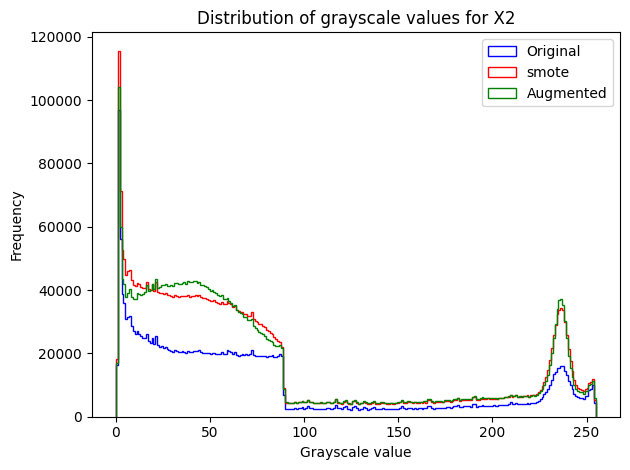

In [23]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
min_max_scaler = MinMaxScaler()
scaled_X_train = min_max_scaler.fit_transform(X_train)
smote = SMOTE(random_state=seed)
X_train_resampled, y_train_resampled = smote.fit_resample(scaled_X_train, y_train)
inverse = min_max_scaler.inverse_transform(X_train_resampled)
plt.hist(X_train.flatten(), bins=256, color='blue', histtype='step', label='Original')
plt.hist(inverse.flatten(), bins=256, color='red', histtype='step', label='smote')
plt.hist(X_train_bal.flatten(), bins=256, color='green', histtype='step', label='Augmented')
plt.title('Distribution of grayscale values for X2')
plt.xlabel('Grayscale value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.savefig('../other/imgs/grayscale_distribution_resampled.png')
plt.show()

In [24]:
length = len(X_train[y_train == 14])

X_train_14_smote = X_train_resampled[y_train_resampled == 14][length:]
X_train_14_aug = X_train_bal[y_train_bal == 14][length:]
print(X_train_14_smote.shape, X_train_14_aug.shape)

random_indices = np.random.choice(range(len(X_train_14_smote)), 9, replace=False)
X_train_14_smote_sample = X_train_14_smote[random_indices]
X_train_14_aug_sample = X_train_14_aug[random_indices]

def visualize_sample_comparison(X1, X2, image_size=(20, 20)):
    plt.figure(figsize=(12, 6))  # Set figure size
    indices = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # Indices for the 9 samples

    for i, idx in enumerate(indices):
        plt.subplot(3, 6, (i % 3) + 1 + (i // 3) * 6) 
        plt.imshow(X1[idx].reshape(image_size), cmap='gray')
        plt.title("SMOTE")
        plt.axis('off')

    for i, idx in enumerate(indices):
        plt.subplot(3, 6, (i % 3) + 4 + (i // 3) * 6) 
        plt.imshow(X2[idx].reshape(image_size), cmap='gray')
        plt.title("Augmented")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# visualize_sample_comparison(X_train_14_smote_sample, X_train_14_aug_sample)


def visualize_preds(X, cols=10):
    num_ood_samples = len(X)

    num_cols = cols
    num_rows = int(np.ceil(num_ood_samples / num_cols))

    _, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))

    for i, ax in enumerate(axes.flat):
        if i < num_ood_samples:
            ax.imshow(X[i].reshape(20, 20), cmap='gray')
            ax.set_title(f"Aug {i+1}")
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.savefig('../other/imgs/aug_E_samples.png')
    plt.show()

# visualize_preds(X_train_14_aug)

(613, 400) (613, 400)


# corrupt dataset

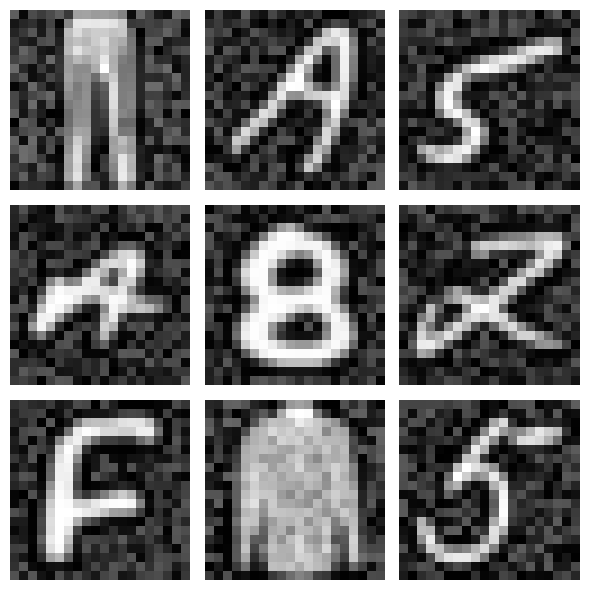

In [25]:
dataset = np.load('../data/corrupt_dataset.npz')
X2 = dataset['X']

random_indices = random.sample(range(X2.shape[0]), 10)
visualize_samples(X2[random_indices])

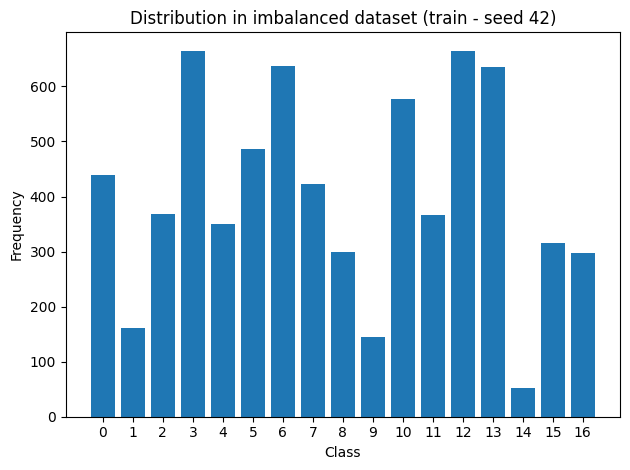

In [26]:
labels, counts = np.unique(y_train, return_counts=True)

plt.bar(labels, counts, align='center')
plt.title('Distribution in imbalanced dataset (train - seed 42)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(17)) 
plt.tight_layout()
plt.show()